## 📘 Working with fitted distributions

This code demonstrates how to **generate Weibull-distributed failure data**, fit a **2-parameter Weibull model**, and **visualize confidence bounds** on both **time** and **reliability** using the `reliability` Python package.

***
### Import Libraries

In [3]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
import matplotlib.pyplot as plt

### Generate Simulated Data

In [ ]:
dist = Weibull_Distribution(alpha=500,beta=3)
data = dist.random_samples(10,seed=1)

### Fit the Weibull Model

In [7]:
fit = Fit_Weibull_2P(failures=data, show_probability_plot=False, print_results=False)

### Compute Confidence Intervals (CI)

Two confidence interval types are calculated using the fitted model’s Cumulative Distribution Function (CDF):

* Time confidence interval (CI_type='time'): uncertainty in time-to-failure for a fixed reliability level (e.g., 70% failure probability).

* Reliability confidence interval (CI_type='reliability'): uncertainty in reliability for a fixed time (e.g., 300 hours).

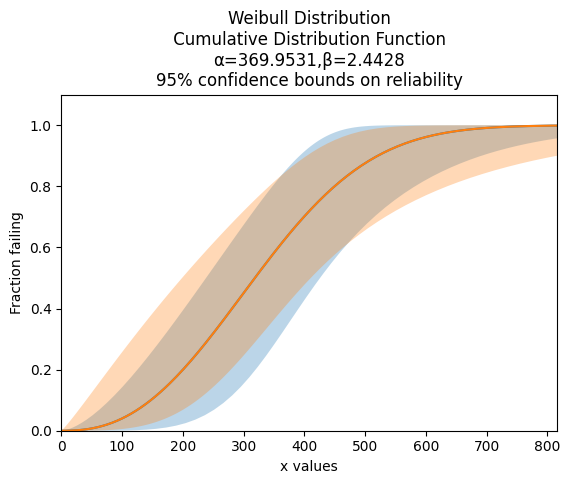

In [8]:
X_lower, X_point, X_upper = fit.distribution.CDF(CI_type='time', CI_y=0.7)
Y_lower, Y_point, Y_upper = fit.distribution.CDF(CI_type='reliability', CI_x=300)

### Plot Confidence Bounds

* Left plot (Time CI): shows the 70% CDF line and confidence limits for time-to-failure (lower, point, upper).
* Right plot (Reliability CI): shows confidence limits on reliability at 300 hours.

Arrows and text labels are used to illustrate:
* Lower, point, and upper bounds for both time and reliability.
* Red arrows show the direction and span of the uncertainty.

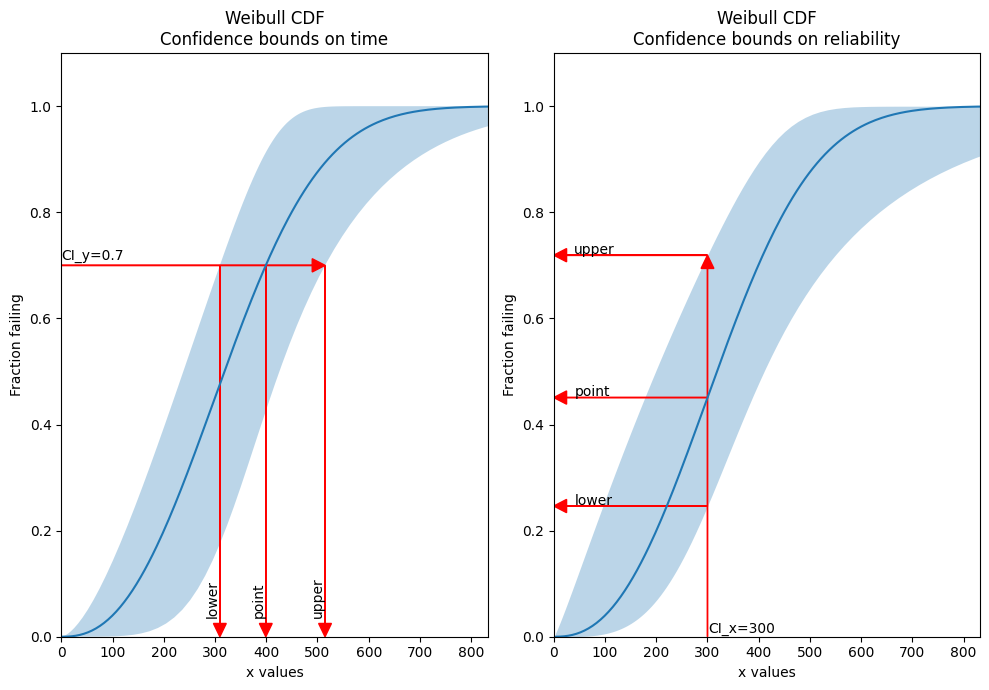

In [9]:
plt.figure(figsize=(10,7))
plt.subplot(121)
arrow_x = 25
arrow_y = 0.025

X_lower,X_point,X_upper = fit.distribution.CDF(CI_type='time',CI_y=0.7)
plt.arrow(x=0,y=0.7,dx=X_upper,dy=0,color='red',head_width=arrow_y,head_length=arrow_x,length_includes_head=True)
plt.arrow(x=X_lower,y=0.7,dx=0,dy=-0.7,color='red',head_width=arrow_x,head_length=arrow_y,length_includes_head=True)
plt.arrow(x=X_point,y=0.7,dx=0,dy=-0.7,color='red',head_width=arrow_x,head_length=arrow_y,length_includes_head=True)
plt.arrow(x=X_upper,y=0.7,dx=0,dy=-0.7,color='red',head_width=arrow_x,head_length=arrow_y,length_includes_head=True)
plt.xlim(0,dist.quantile(0.99))
plt.ylim(0,1.1)
plt.text(x=0,y=0.705,s='CI_y=0.7',va='bottom')
plt.text(x=X_lower,y=0.035,s='lower',va='bottom',ha='right',rotation=90)
plt.text(x=X_point,y=0.035,s='point',va='bottom',ha='right',rotation=90)
plt.text(x=X_upper,y=0.035,s='upper',va='bottom',ha='right',rotation=90)
plt.title('Weibull CDF\nConfidence bounds on time')

plt.subplot(122)
Y_lower,Y_point,Y_upper = fit.distribution.CDF(CI_type='reliability',CI_x=300)
plt.arrow(x=300,y=0,dx=0,dy=Y_upper,color='red',head_width=arrow_x,head_length=arrow_y,length_includes_head=True)
plt.arrow(x=300,y=Y_lower,dx=-300,dy=0,color='red',head_width=arrow_y,head_length=arrow_x,length_includes_head=True)
plt.arrow(x=300,y=Y_point,dx=-300,dy=0,color='red',head_width=arrow_y,head_length=arrow_x,length_includes_head=True)
plt.arrow(x=300,y=Y_upper,dx=-300,dy=0,color='red',head_width=arrow_y,head_length=arrow_x,length_includes_head=True)
plt.xlim(0,dist.quantile(0.99))
plt.ylim(0,1.1)
plt.text(x=301,y=0.001,s='CI_x=300',va='bottom')
plt.text(x=40,y=Y_lower+0.002,s='lower')
plt.text(x=40,y=Y_point+0.002,s='point')
plt.text(x=40,y=Y_upper+0.002,s='upper')

plt.title('Weibull CDF\nConfidence bounds on reliability')
plt.tight_layout()
plt.show()

### Interpretation

* The left subplot answers: “At 70% failure probability, what is the uncertainty in time-to-failure?”
* The right subplot answers: “At 300 hours, what is the uncertainty in reliability?”
* Narrower bands indicate a more confident fit (less data uncertainty).
* The approach helps engineers quantify uncertainty in reliability estimates derived from limited sample data.

***
## 📘 Example-2

This example demonstrates how to **fit a 2-Parameter Weibull Distribution** to simulated failure data and visualize multiple reliability-related functions — including **PDF**, **CDF**, **SF**, **HF**, and **CHF** — along with their **confidence intervals** for both *time* and *reliability*.

### Import the Required Libraries

In [11]:
import matplotlib.pyplot as plt
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P

### Generate Sample Data

In [12]:
dist = Weibull_Distribution(alpha=50,beta=2)
data = dist.random_samples(10,seed=1)

### Fit the Weibull Model

In [13]:
fit = Fit_Weibull_2P(failures=data,show_probability_plot=False,print_results=False)

### Define Confidence Interval Reference Points

* CI_y values (0.25, 0.5, 0.75): correspond to 25%, 50%, and 75% failure probabilities.
* CI_x values: the times corresponding to those probabilities (quantiles).
* These points are used to visualize uncertainty bands for both time and reliability.

In [15]:
CI_x = [dist.quantile(0.25),dist.quantile(0.5),dist.quantile(0.75)]
CI_y = [0.25,0.5,0.75]

### 🧩 Create Subplots for Each Reliability Function

This example extends previous Weibull distribution examples by generating **multiple reliability plots** —  
including **PDF**, **CDF**, **SF**, **HF**, and **CHF**, each with **confidence intervals** for both **time** and **reliability**.  

##### 📈 PDF (Probability Density Function):
- Describes the distribution of failure times.


##### 📊 CDF (Cumulative Distribution Function)
- Shows cumulative failure probability over time.  
- Subplot **"CDF time"** adds confidence bounds for fixed probabilities (`CI_y`).  
- Subplot **"CDF reliability"** adds confidence bounds for fixed times (`CI_x`).

##### 🧮 SF (Survival Function)
- Represents the probability that the system survives beyond time *t*.  
- Plotted with both **time** and **reliability** confidence intervals.

##### ⚙️ HF (Hazard Function)
- Instantaneous failure rate; increases with time for $\beta > 1$.


##### 📉 CHF (Cumulative Hazard Function)
- Shows the total accumulated risk of failure up to time *t*.  
- Subplots **“CHF time”** and **“CHF reliability”** show uncertainty bounds on hazard accumulation.

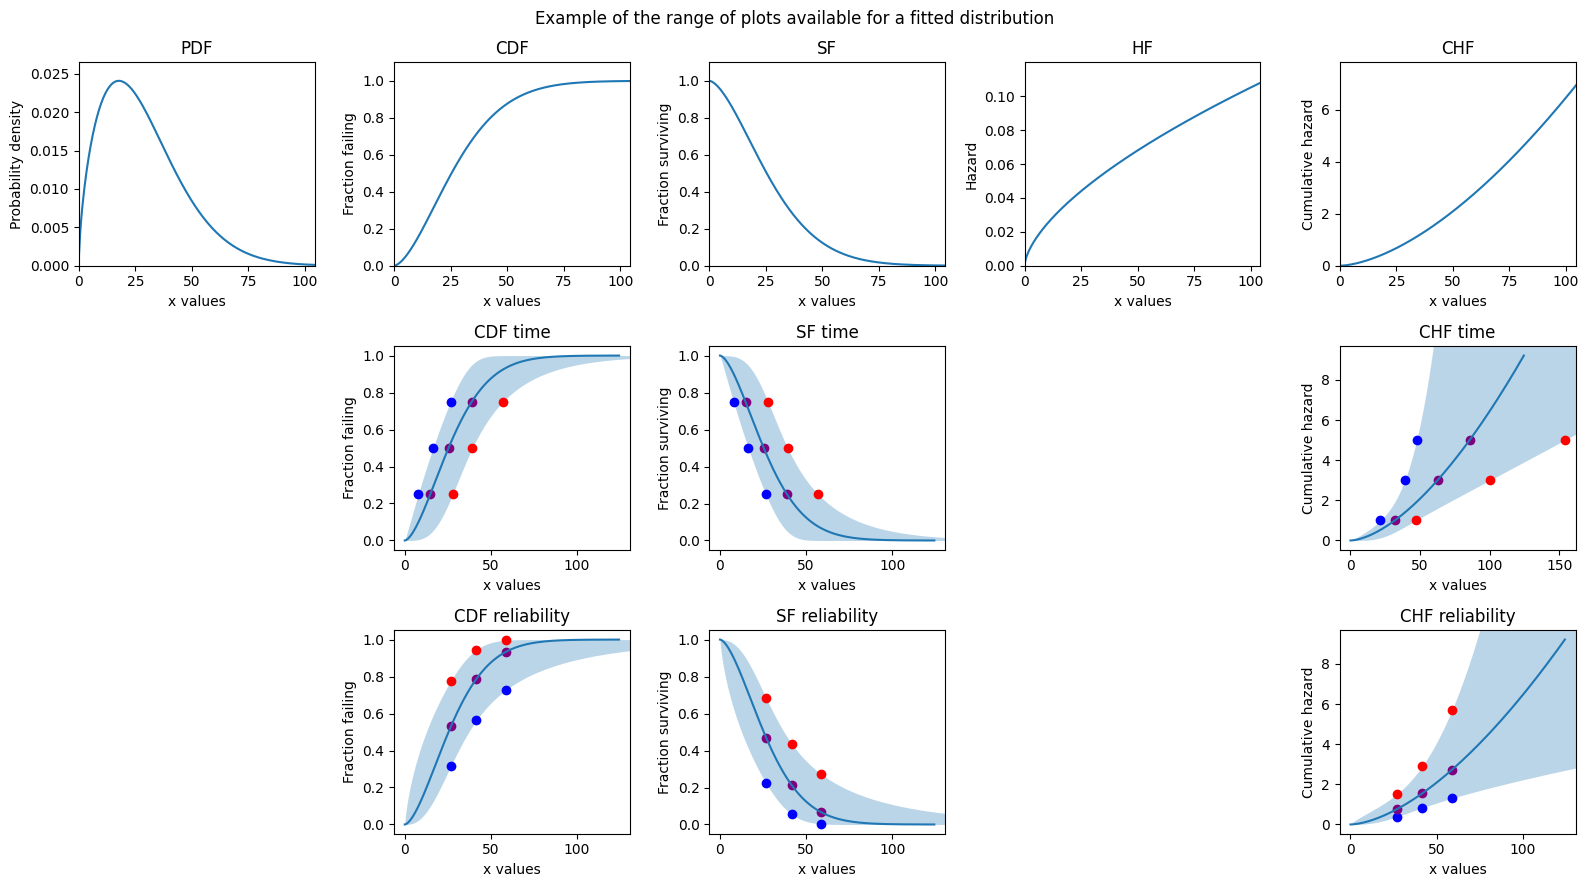

In [16]:
plt.figure(figsize=(16,9))
plt.subplot(3,5,1)
fit.distribution.PDF()
plt.title('PDF')

plt.subplot(3,5,2)
fit.distribution.CDF(plot_CI=False)
plt.title('CDF')

plt.subplot(3,5,7)
lower, point, upper = fit.distribution.CDF(CI_y=CI_y,CI_type='time')
plt.scatter(lower,CI_y,color='blue')
plt.scatter(point,CI_y,color='purple')
plt.scatter(upper,CI_y,color='red')
plt.title('CDF time')

plt.subplot(3,5,12)
lower, point, upper = fit.distribution.CDF(CI_x=CI_x,CI_type='rel')
plt.scatter(CI_x,lower,color='blue')
plt.scatter(CI_x,point,color='purple')
plt.scatter(CI_x,upper,color='red')
plt.title('CDF reliability')

plt.subplot(3,5,3)
fit.distribution.SF(plot_CI=False)
plt.title('SF')

plt.subplot(3,5,8)
lower, point, upper = fit.distribution.SF(CI_y=CI_y,CI_type='time')
plt.scatter(lower,CI_y,color='blue')
plt.scatter(point,CI_y,color='purple')
plt.scatter(upper,CI_y,color='red')
plt.title('SF time')

plt.subplot(3,5,13)
lower, point, upper = fit.distribution.SF(CI_x=CI_x,CI_type='rel')
plt.scatter(CI_x,lower,color='blue')
plt.scatter(CI_x,point,color='purple')
plt.scatter(CI_x,upper,color='red')
plt.title('SF reliability')

plt.subplot(3,5,4)
fit.distribution.HF()
plt.title('HF')

plt.subplot(3,5,5)
fit.distribution.CHF(plot_CI=False)
plt.title('CHF')

plt.subplot(3,5,10)
CI_y_chf = [1,3,5]
lower, point, upper = fit.distribution.CHF(CI_y=CI_y_chf,CI_type='time')
plt.scatter(lower,CI_y_chf,color='blue')
plt.scatter(point,CI_y_chf,color='purple')
plt.scatter(upper,CI_y_chf,color='red')
plt.title('CHF time')

plt.subplot(3,5,15)
lower, point, upper = fit.distribution.CHF(CI_x=CI_x,CI_type='rel')
plt.scatter(CI_x,lower,color='blue')
plt.scatter(CI_x,point,color='purple')
plt.scatter(CI_x,upper,color='red')
plt.title('CHF reliability')

plt.suptitle('Example of the range of plots available for a fitted distribution')
plt.tight_layout()
plt.show()

***
## 📘 Example 3— Reliability Estimation for Automotive Component

This example uses a **real-world dataset** from the `reliability` package to estimate the **system reliability after 100,000 miles** using the **Weibull 2-Parameter model**.  It demonstrates how to handle **failure** and **right-censored** data and how to compute **confidence intervals** for reliability at a specified lifetime.

#### Import Required Libraries

In [1]:
from reliability.Datasets import automotive
from reliability.Fitters import Fit_Weibull_2P
import matplotlib.pyplot as plt

#### Fit the Weibull Model to the Data

In [2]:
fit = Fit_Weibull_2P(
    failures=automotive().failures,
    right_censored=automotive().right_censored,
    show_probability_plot=False
)

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 10/21 (67.74194% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha          134651         42767.3   72252.9    250937
     Beta         1.15443         0.29614  0.698249   1.90863 

Goodness of fit    Value
 Log-likelihood -128.974
           AICc  262.376
            BIC  264.816
             AD  35.6052 



#### Compute Reliability and Confidence Intervals

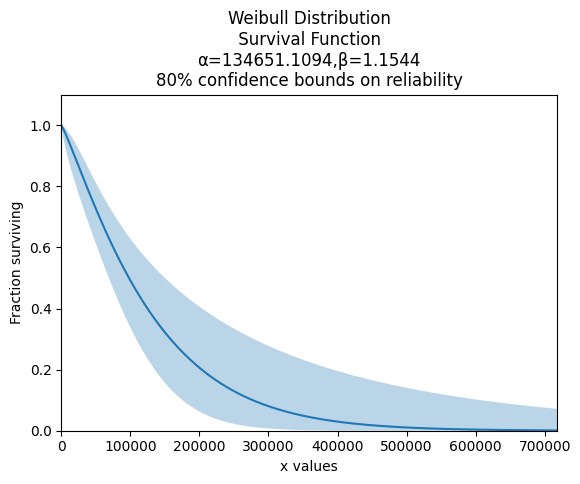

In [3]:
# we want to know the system reliability after 100000 miles
lower,point,upper = fit.distribution.SF(CI_x=100000,CI_type='reliability',CI=0.8)

#### Visualize and Print Results

Failures: [5248, 7454, 16890, 17200, 38700, 45000, 49390, 69040, 72280, 131900]
Right censored: [3961, 4007, 4734, 6054, 7298, 10190, 23060, 27160, 28690, 37100, 40060, 45670, 53000, 67000, 69630, 77350, 78470, 91680, 105700, 106300, 150400]

The 80% reliability estimates at 100000 miles are:
lower bound: 33.83%
point estimate: 49.20%
upper bound: 62.87%


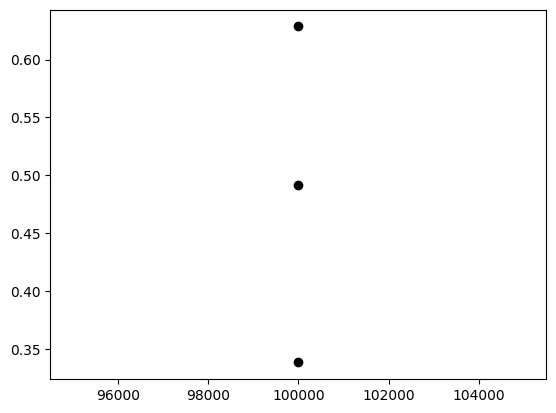

In [4]:
plt.scatter([100000,100000,100000],[lower,point,upper],color='black')

print('Failures:',automotive().failures)
print('Right censored:',automotive().right_censored)
print('')
print("The 80% reliability estimates at 100000 miles are:")
print("lower bound: "+"{:.2%}".format(lower))
print("point estimate: "+"{:.2%}".format(point))
print("upper bound: "+"{:.2%}".format(upper))
plt.show()

#### 🧠 Interpretation of Results — Automotive Component Reliability

**Dataset Summary:**
- **Failures:** 10 observed failure events (mileage values at which the component actually failed).  
- **Right-censored data:** 21 components that survived up to the listed mileage without failure (e.g., still operating or removed from testing).  
  → Including censored data improves model accuracy because it captures the fact that not all units failed within the test duration.


**Model Results (at 100,000 miles, 80% confidence interval):**
- **Lower bound:** 33.83%  
- **Point estimate:** 49.20%  
- **Upper bound:** 62.87%


**Interpretation:**
- At **100,000 miles**, the **estimated reliability** of the component is about **49%**, meaning that roughly **half of the population** is expected to survive beyond that mileage without failure.  
- The **80% confidence interval** (33.83%–62.87%) represents the **uncertainty range** in this estimate due to sample size and data variability.
  - **Lower bound (33.83%)** → conservative estimate of reliability (worst case).  
  - **Upper bound (62.87%)** → optimistic estimate (best case).  


**Engineering Insight:**
- The reliability curve suggests that by 100,000 miles, a significant portion of components will have failed, indicating potential **wear-out behavior**.  
- The model can inform:
  - **Warranty planning:** Only about half of units are expected to last past 100k miles.  
  - **Maintenance scheduling:** Preventive replacements or inspections should be scheduled before this point.  
  - **Design improvement:** Focus on extending wear-out life (e.g., material upgrades or improved cooling).  

In summary, the Weibull analysis provides both **a quantitative reliability estimate** and **a statistical confidence range**, helping engineers make data-driven maintenance and design decisions.